In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("mobil_data.csv")
df.head()

BataryaGucu Bluetooth MikroislemciHizi CiftHat OnKameraMP   4G  \
0         1325       Yok              1,9     Yok        2,0  Yok   
1         1046       Var              2,8     Var        0.0  Var   
2          843       Yok              1,3     Var        1.0  Yok   
3          894       Yok              0,5     Var        1,0  Var   
4          936       Yok              1,0     Yok        1.0  Yok   

   DahiliBellek Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50      0,1      146               1            10   
1            58      0,2      100               8             0   
2            16      0,9      119               7             4   
3            50      0,5      199               3            14   
4            18      0,2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
0                  499                 695  2328.0            2  Var   
1                  259                1040  3863.0            9  Var   
2                  593                 732  1734.0           14  Yok   
3                 1285                1462  3615.0            6  Var   
4                 1330                1686  2391.0            3  Var   

  Dokunmatik WiFi FiyatAraligi     Renk  
0        Yok  Yok       Normal    Beyaz  
1        Var  Var       Pahalı    Pembe  
2        Yok  Var         Ucuz      Mor  
3        Yok  Var       Pahalı  Turuncu  
4        Var  Var       Normal    Beyaz

In [3]:
df.shape

(2017, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2017 non-null   int64  
 1   Bluetooth            2017 non-null   object 
 2   MikroislemciHizi     2017 non-null   object 
 3   CiftHat              2017 non-null   object 
 4   OnKameraMP           2012 non-null   object 
 5   4G                   2017 non-null   object 
 6   DahiliBellek         2017 non-null   int64  
 7   Kalinlik             2017 non-null   object 
 8   Agirlik              2017 non-null   int64  
 9   CekirdekSayisi       2017 non-null   int64  
 10  ArkaKameraMP         2017 non-null   int64  
 11  CozunurlukYükseklik  2017 non-null   int64  
 12  CozunurlukGenislik   2017 non-null   int64  
 13  RAM                  2005 non-null   float64
 14  BataryaOmru          2017 non-null   int64  
 15  3G                   2013 non-null   o

In [5]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      4
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

OnKameraMP, RAM and 3G have some missing data.

In [6]:
df.describe()

BataryaGucu  DahiliBellek      Agirlik  CekirdekSayisi  ArkaKameraMP  \
count  2017.000000   2017.000000  2017.000000     2017.000000   2017.000000   
mean   1238.777392     32.064948   140.164105        4.521071      9.916212   
std     439.821621     18.154573    35.392321        2.287535      6.073493   
min     501.000000      2.000000    80.000000        1.000000      0.000000   
25%     852.000000     16.000000   109.000000        3.000000      5.000000   
50%    1225.000000     32.000000   141.000000        4.000000     10.000000   
75%    1617.000000     48.000000   170.000000        7.000000     15.000000   
max    1998.000000     64.000000   200.000000        8.000000     20.000000   

       CozunurlukYükseklik  CozunurlukGenislik          RAM  BataryaOmru  
count          2017.000000         2017.000000  2005.000000  2017.000000  
mean            645.909767         1250.790283  2116.214963    11.002975  
std             443.489410          431.963608  1080.550758     5.464259  
min               0.000000          500.000000   256.000000     2.000000  
25%             283.000000          875.000000  1206.000000     6.000000  
50%             570.000000         1247.000000  2129.000000    11.000000  
75%             950.000000         1631.000000  3038.000000    16.000000  
max            1960.000000         1998.000000  3998.000000    20.000000

In [7]:
df[df.ArkaKameraMP == 0].FiyatAraligi.value_counts()

Çok Ucuz    33
Ucuz        27
Normal      21
Pahalı      21
Name: FiyatAraligi, dtype: int64

In [8]:
df[df.OnKameraMP == "0.0"].FiyatAraligi.value_counts()

Çok Ucuz    88
Ucuz        85
Normal      82
Pahalı      70
Name: FiyatAraligi, dtype: int64

I cannot imagine that a phone has a 0 MP camera and it is classified as "Pahalı". The dataset looks suspicious.

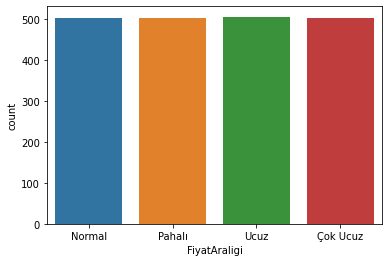

In [9]:
sns.countplot(data=df, x="FiyatAraligi");

In [10]:
df.FiyatAraligi.value_counts()

Ucuz        506
Pahalı      504
Normal      504
Çok Ucuz    503
Name: FiyatAraligi, dtype: int64

The dataset is balanced.

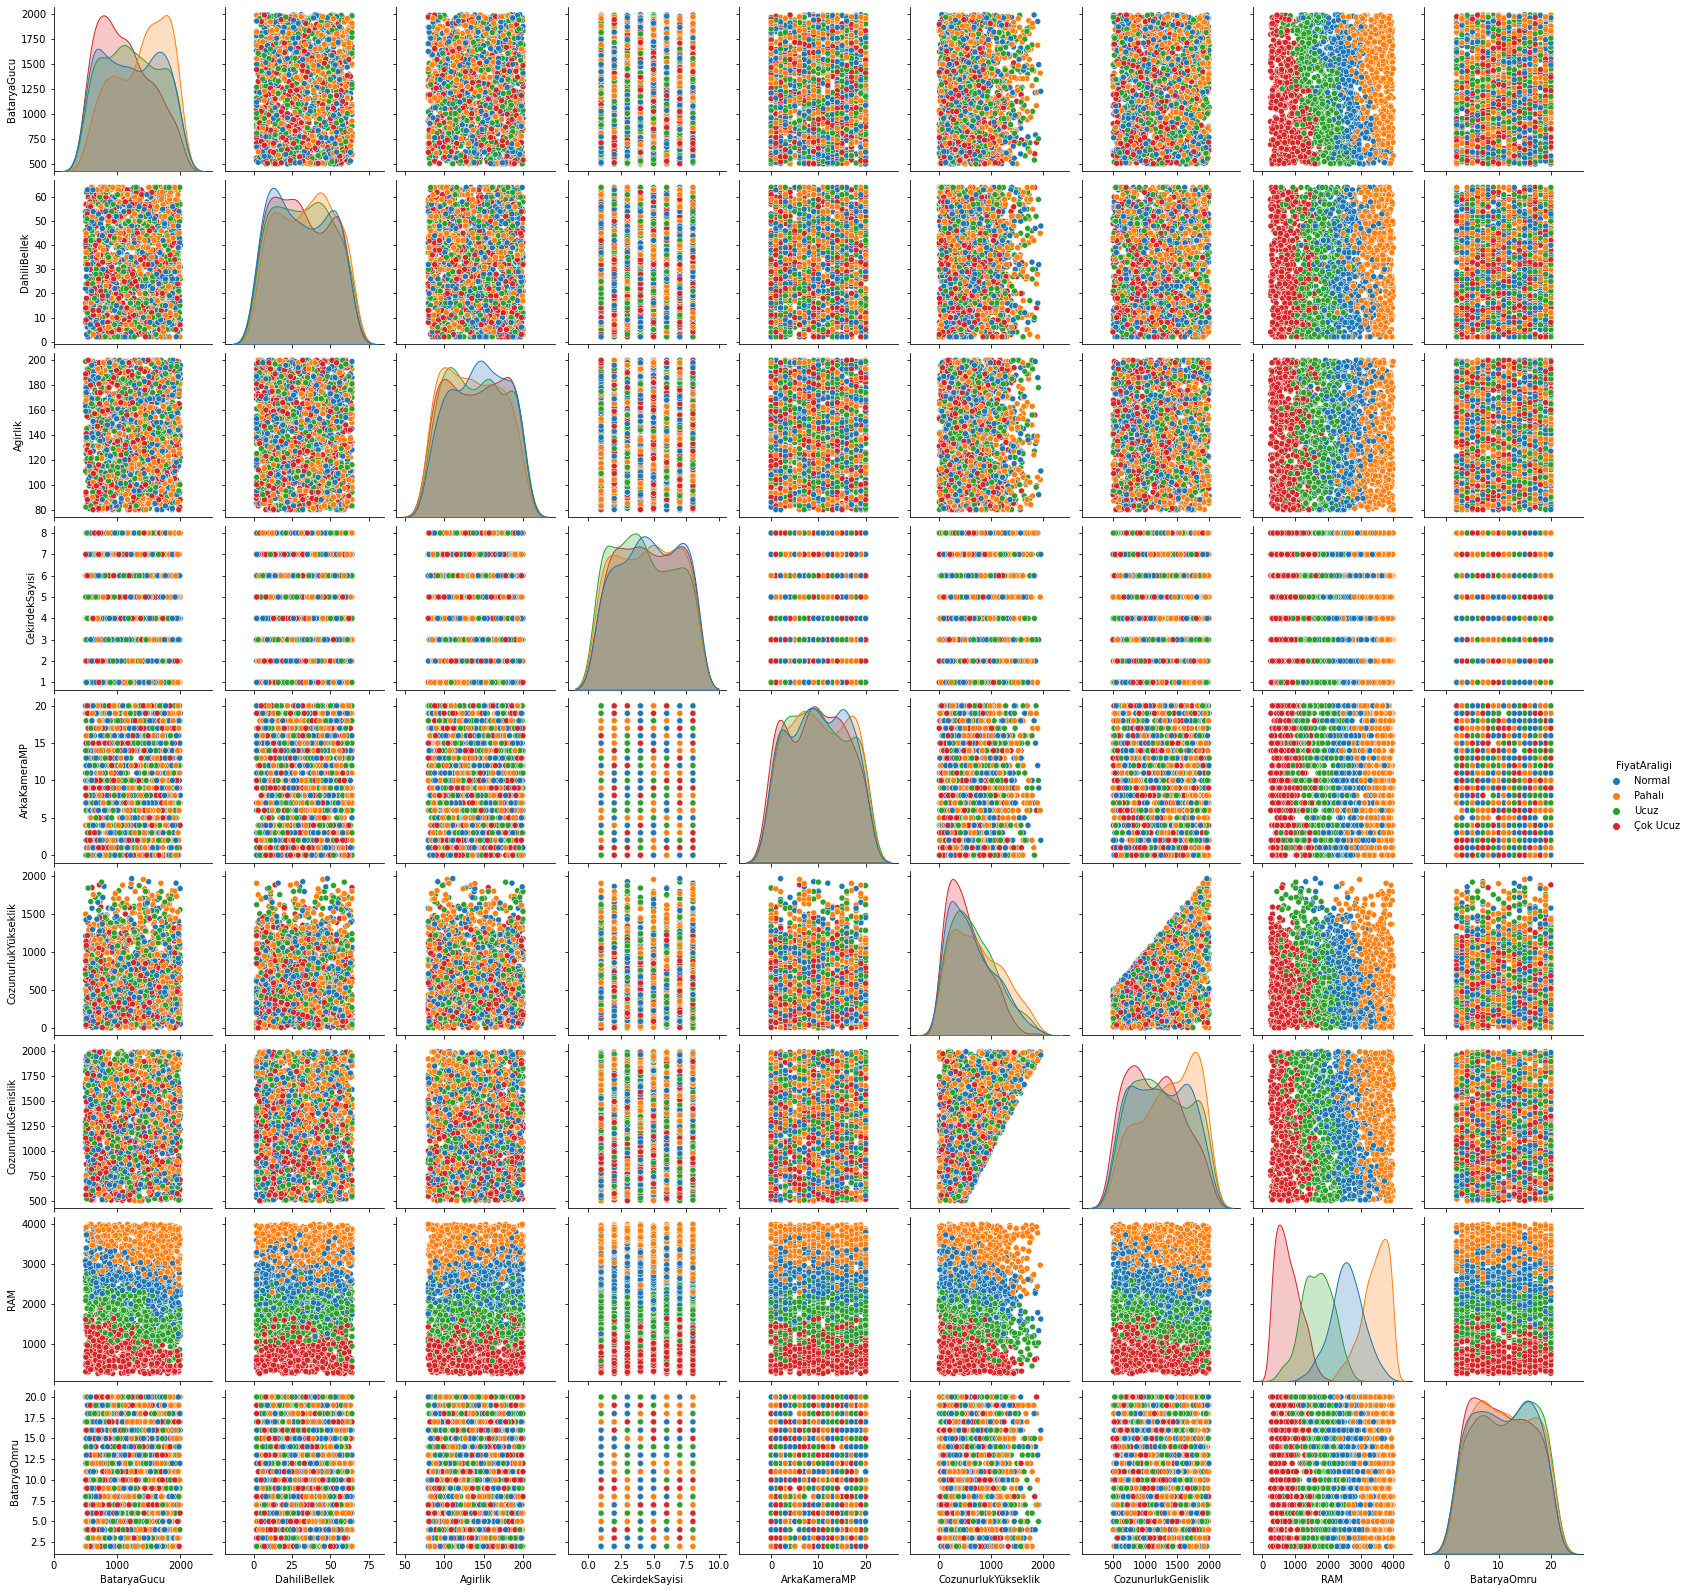

In [11]:
sns.pairplot(df, hue="FiyatAraligi");

It looks like RAM is an important feature. <br> In the figure above, there is no obvious data as an outlier. Because of this reason, I think data cleaning is not necessary.

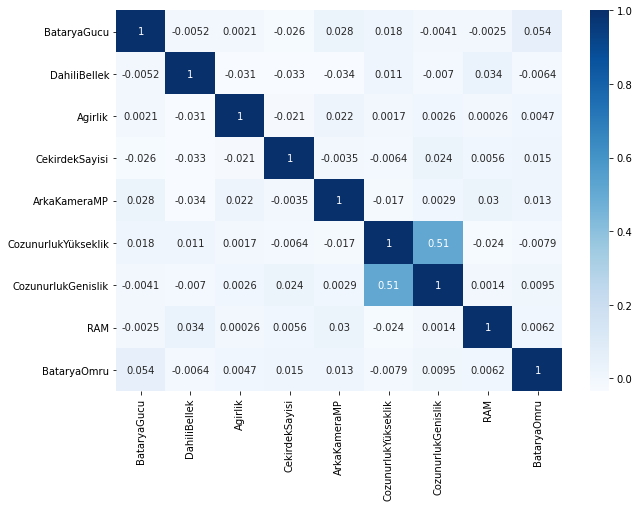

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues);

CozunurlukYükseklik and CozunurlukGenislik are correlated. We can multiply or divide these values to each other.

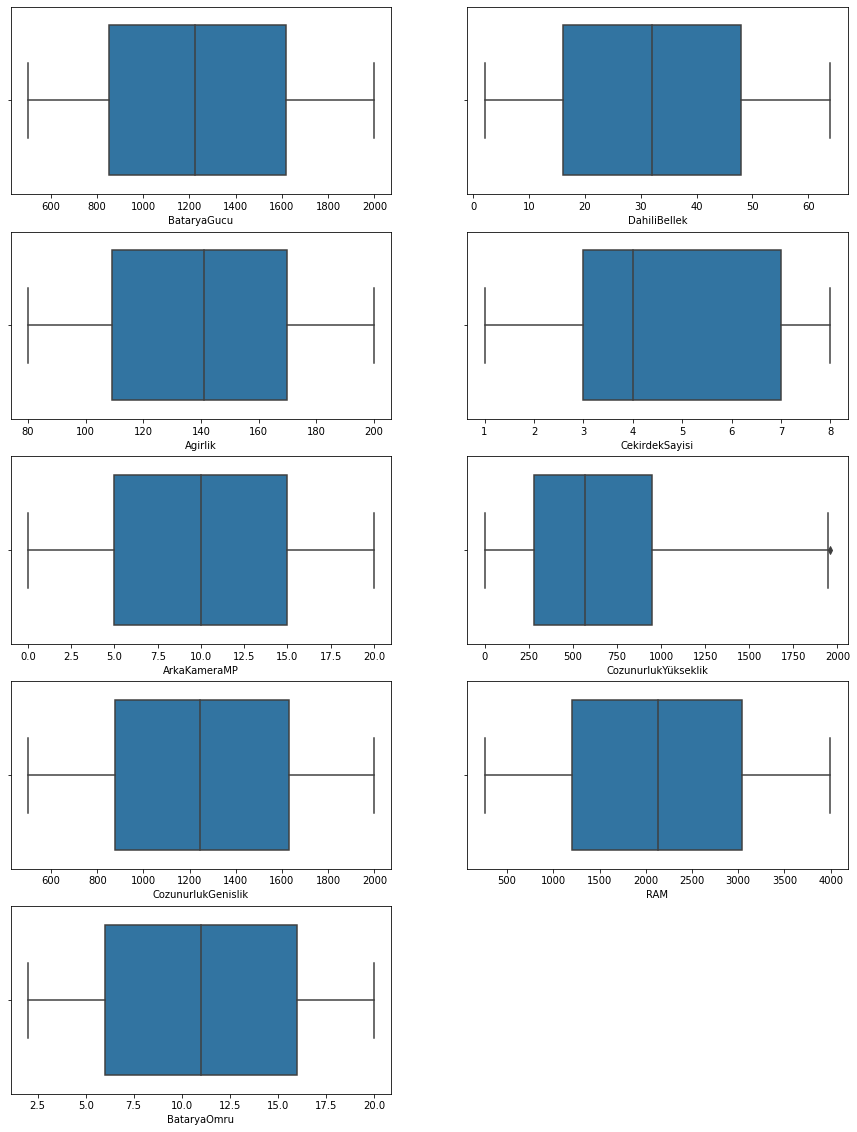

In [13]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.select_dtypes(np.number).columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(df[col])



Except for the CozunurlukYükseklik feature, all the features do not have any outliers.

In [14]:
df.CozunurlukYükseklik.quantile(0.75) - df.CozunurlukYükseklik.quantile(0.25)

667.0

In [15]:
df.CozunurlukYükseklik.quantile(0.75) + 667

1617.0

In [16]:
df[df.CozunurlukYükseklik > 1617].shape       #outliers

(61, 20)

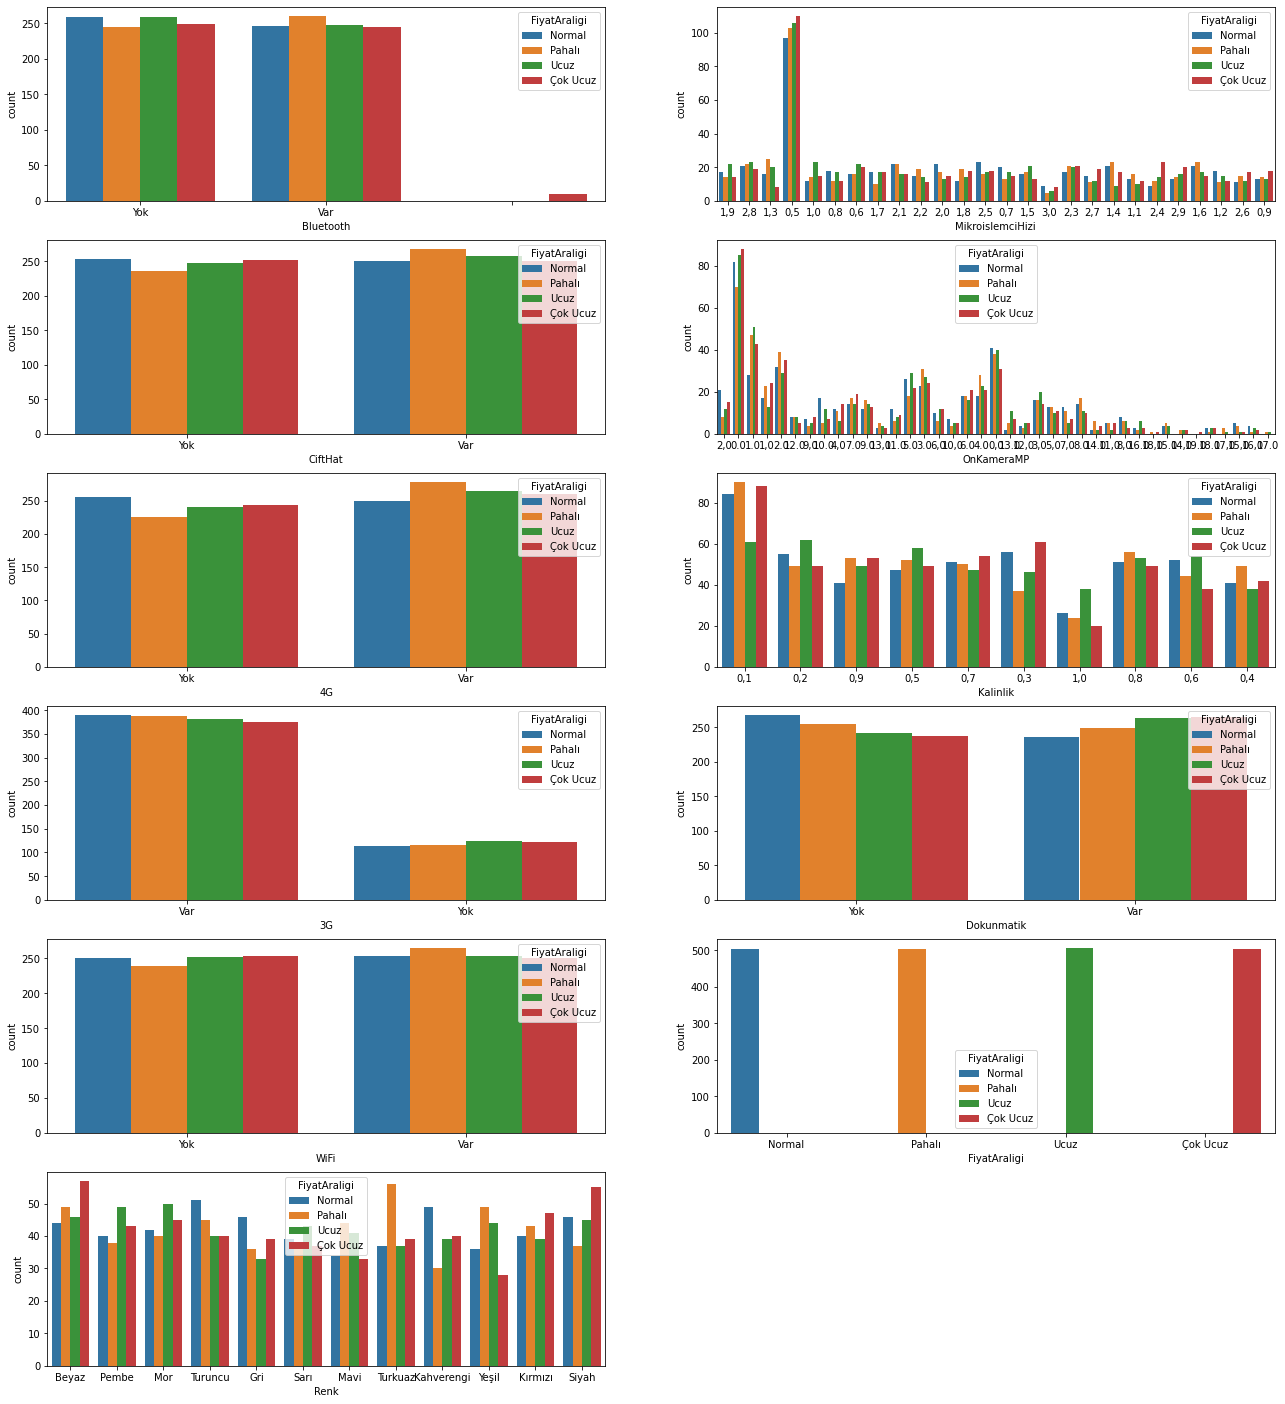

In [17]:
plt.figure(figsize=(22, 25))
for i, feature in enumerate(df.select_dtypes("object")):
    plt.subplot(6, 2, i+1)
    sns.countplot(data=df, x=feature, hue="FiyatAraligi")

In [18]:
df.skew()

BataryaGucu            0.033492
DahiliBellek           0.058522
Agirlik                0.010464
CekirdekSayisi         0.003764
ArkaKameraMP           0.020059
CozunurlukYükseklik    0.660285
CozunurlukGenislik     0.016849
RAM                    0.013703
BataryaOmru            0.013411
dtype: float64

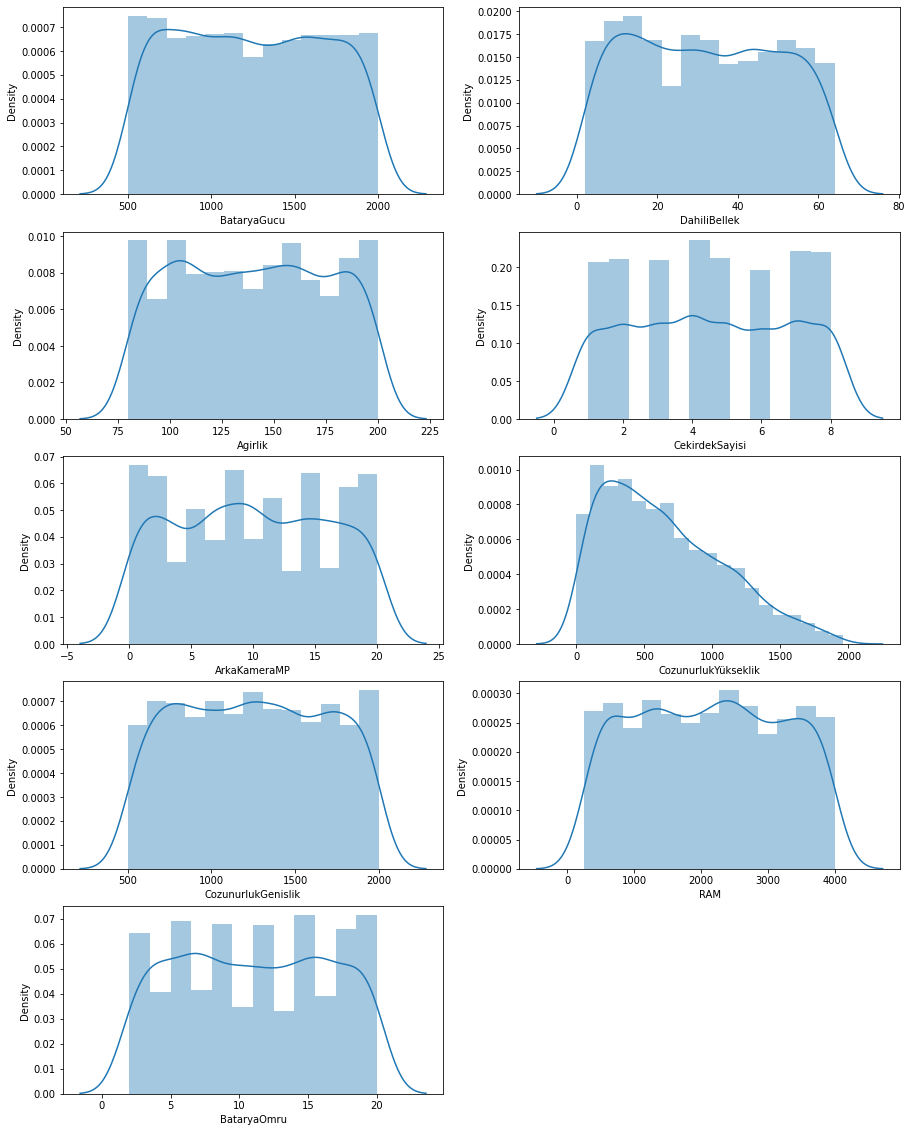

In [19]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.select_dtypes(np.number)):
    plt.subplot(5, 2, i+1)
    sns.distplot(df[feature], )

<Figure size 1080x1440 with 0 Axes>

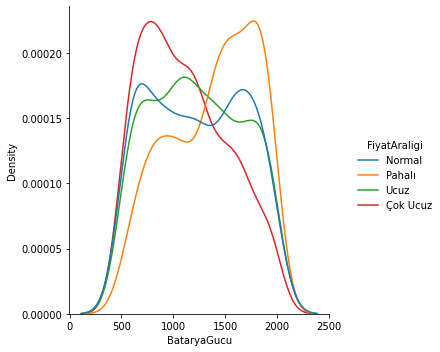

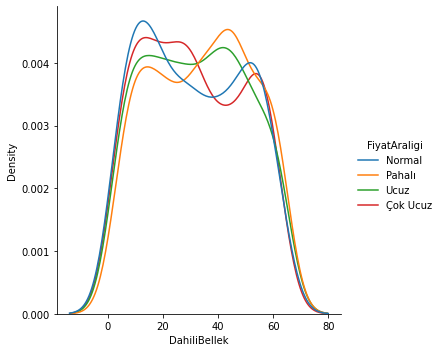

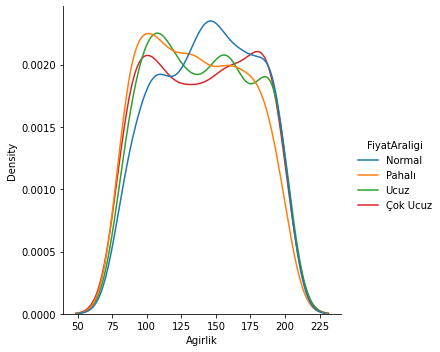

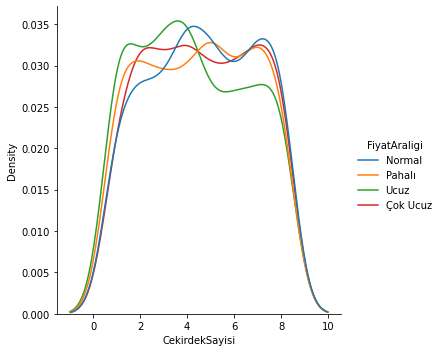

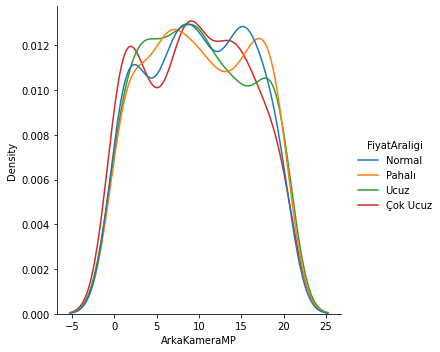

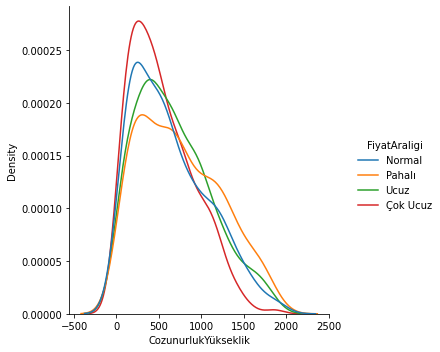

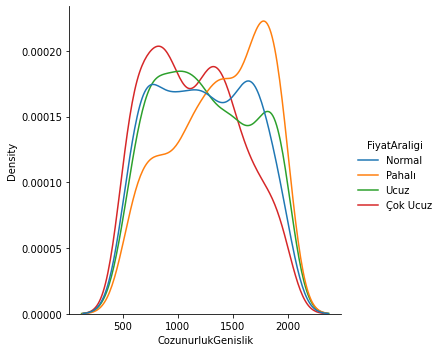

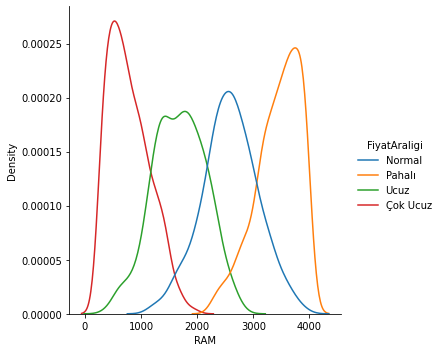

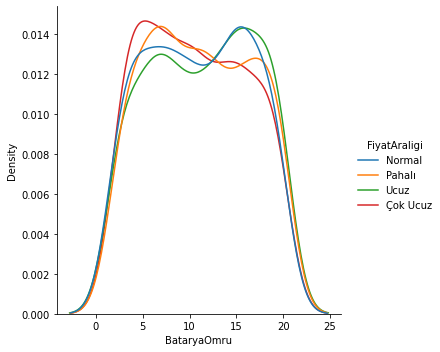

In [20]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.select_dtypes(np.number)):
    sns.displot(data=df, x=feature, hue="FiyatAraligi", kind="kde");